In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

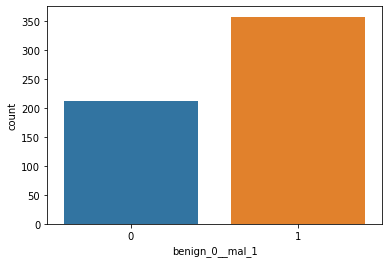

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

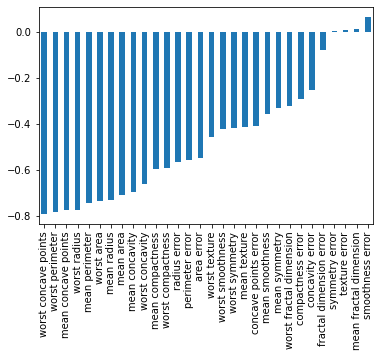

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

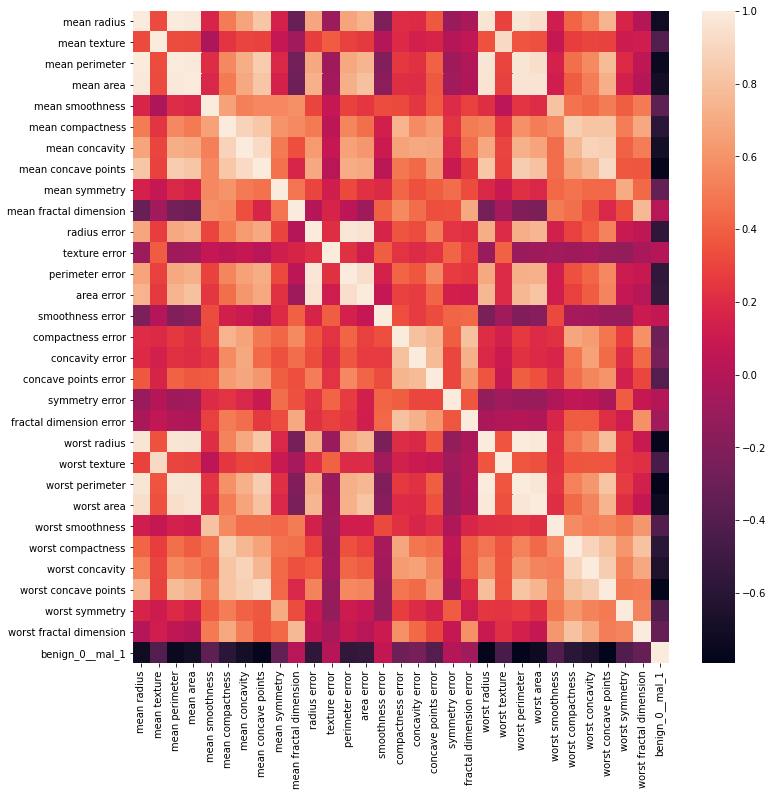

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [22]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6899 - val_loss: 0.6726
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6657 - val_loss: 0.6441
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6419 - val_loss: 0.6076
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6109 - val_loss: 0.5705
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5739 - val_loss: 0.5285
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5382 - val_loss: 0.4884
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4908 - val_loss: 0.4434
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4760 - val_loss: 0.4004
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4205 - val_loss: 0.3586
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3911 - val_loss: 0.3216
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0640
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0538 - val_loss: 0.0559
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0470 - val_loss: 0.0573
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0679 - val_loss: 0.0552
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.0570
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0433 - val_loss: 0.0556
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0578 - val_loss: 0.0580
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0549 - val_loss: 0.0594
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0593
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0550
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0485 - val_loss: 0.0560
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0457 - val_loss: 0.0658
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0616
Epoch 167/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0255 - val_loss: 0.0602
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.0575
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0459 - val_loss: 0.0567
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.0626
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0460 - val_loss: 0.0550
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0370 - val_loss: 0.0737
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0422 - val_loss: 0.0532
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0251 - val_loss: 0.0671
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0288 - val_loss: 0.0775
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0383 - val_loss: 0.0626
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0295 - val_loss: 0.0697
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0754
Epoch 250/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0293 - val_loss: 0.0697
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0643
Epoch 252/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0818
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0355 - val_loss: 0.0641
Epoch 254/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.0840
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.0743
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0201 - val_loss: 0.1092
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0969
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0134 - val_loss: 0.0796
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.1010
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.1136
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 0.0798
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0206 - val_loss: 0.1186
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0907
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0964
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0135 - val_loss: 0.1312
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.1171
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.1475
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0151 - val_loss: 0.1236
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0115 - val_loss: 0.1127
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1196
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0149 - val_loss: 0.1193
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0153 - val_loss: 0.1123
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.1307
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0141 - val_loss: 0.1305
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.1924
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.1367
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.1368
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.1776
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.1277
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.1528
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0095 - val_loss: 0.1393
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.1816
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.1455
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0106 - val_loss: 0.1502
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.1641
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.1555
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.1654
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 0.1629
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 0.1781
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.1672
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0057 - val_loss: 0.1801
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.1582
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.1687
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.1884
Epoc

In [25]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.685720,0.672628
1,0.663027,0.644060
2,0.636945,0.607642
3,0.602909,0.570550
4,0.569785,0.528511
...,...,...
595,0.004451,0.174028
596,0.004124,0.181553
597,0.003877,0.174275
598,0.004026,0.196245


<AxesSubplot:>

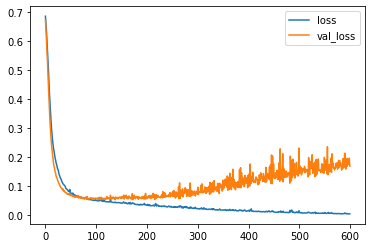

In [26]:
losses.plot()

# Stopping when overfitting

In [27]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6838 - val_loss: 0.6477
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6438 - val_loss: 0.5970
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5992 - val_loss: 0.5444
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5551 - val_loss: 0.4864
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4990 - val_loss: 0.4263
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4305 - val_loss: 0.3730
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4022 - val_loss: 0.3248
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3400 - val_loss: 0.2825
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3103 - val_loss: 0.2535
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2760 - val_loss: 0.2270
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0396 - val_loss: 0.0603
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0562 - val_loss: 0.0572
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0575
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0523 - val_loss: 0.0586
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0488 - val_loss: 0.0553
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0421 - val_loss: 0.0563
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0450 - val_loss: 0.0601
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0447 - val_loss: 0.0569
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0664 - val_loss: 0.0535
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.0585
Epoch 93/600


<AxesSubplot:>

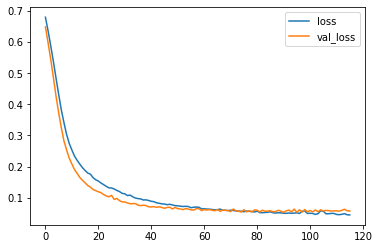

In [32]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Adding Dropout

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [35]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6809 - val_loss: 0.6529
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6588 - val_loss: 0.6257
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6282 - val_loss: 0.5971
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6212 - val_loss: 0.5571
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5841 - val_loss: 0.5103
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5762 - val_loss: 0.4626
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5285 - val_loss: 0.4139
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4857 - val_loss: 0.3598
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4459 - val_loss: 0.3093
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4098 - val_loss: 0.2721
Epoch 11/

14/14 [==============================] - 0s 2ms/step - loss: 0.0945 - val_loss: 0.0534
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0568 - val_loss: 0.0521
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0580 - val_loss: 0.0505
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0736 - val_loss: 0.0507
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0785 - val_loss: 0.0525
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0633 - val_loss: 0.0527
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1007 - val_loss: 0.0550
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0896 - val_loss: 0.0532
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.0504
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0620 - val_loss: 0.0522
Epoch 93/600


<AxesSubplot:>

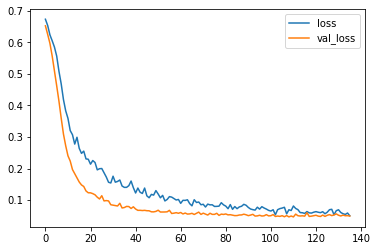

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [42]:
print(confusion_matrix(y_test, predictions))

[[52  2]
 [ 1 88]]
